In [1]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [2]:
anime_df = pd.read_csv("./data/anime.csv")

In [3]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
anime_df.shape

(12294, 7)

- We have 12294 animes in the database

### Fixing Dtypes 

In [5]:
anime_df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

- Here **episodes** column encoded as object! This will hamper our preliminary analysis! Lets change this to integers

In [6]:
# anime_df['episodes'] = anime_df['episodes'].astype(str).str.strip().astype(float)
# I cant do this, as it results in error in casting
# Lets see whats going on

In [7]:
anime_df['episodes'].isnull().sum()
# It says no missing values

0

In [8]:
anime_df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

- They encoded NULL values as 'Unknown' here

This happens quite often! Lets change it

In [9]:
anime_df[anime_df['episodes'] == 'Unknown'].count()

anime_id    340
name        340
genre       329
type        315
episodes    340
rating      188
members     340
dtype: int64

- There's 340 values in episodes columns encoded as Unknown
- Its noticable that if it encoded as Unknown chances of value missing in other columns are high
- maybe these are obscure animes
- will check into details later

But first lets change it to np.nan

In [10]:
# anime_df['episodes'].replace('Unknown',np.nan,inplace=True)
# anime_df['episodes'] = anime_df['episodes'].astype(str).astype('float16')

# these two lines can be combined with this:

anime_df['episodes'] = pd.to_numeric(anime_df['episodes'],errors='coerce',downcast='integer')

In [11]:
anime_df[anime_df['episodes'] == 'Unknown'].count()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

- Looks good now!
- Lets change our dtype to integer now

In [12]:
anime_df['episodes'].isnull().sum()

340

- Works NOW!

### Uniqueness Check

In [13]:
anime_df.anime_id.is_unique

True

In [14]:
anime_df.name.is_unique

False

- Though all the anime_id's are unique not all name of the anime's not unique

In [15]:
anime_df['name'].nunique()

12292

- 2 values causing the problem

Lets find those

In [16]:
anime_df[anime_df['name'].duplicated()]['name'].values

array(['Saru Kani Gassen', 'Shi Wan Ge Leng Xiaohua'], dtype=object)

- Its weird they are seen as duplicated! Which they certainly arent! Will check how to solve this inconsistencies later

### Missing Values Check

- Previously we have encountered how this dataset encodes missing value in format that is not handled automatically by Pandas! So we have to extra careful here

In [17]:
for col in anime_df.columns:
    print(f"{col} : {anime_df[col].isnull().sum()}")

anime_id : 0
name : 0
genre : 62
type : 25
episodes : 340
rating : 230
members : 0


- will handle missing values in **genre, type and rating** later

In [18]:
anime_df['type'].unique().tolist()

['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan]

- Looks good for now!

### Lets check some distribution of our features

##### Type

In [19]:
anime_df['type'].value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

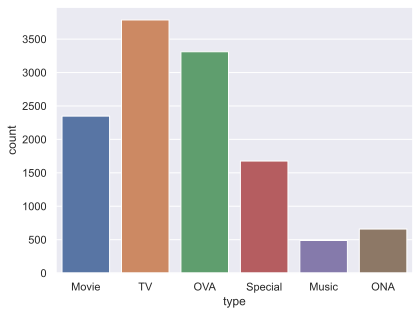

In [20]:
# visualizing is always better
# as this is a categorical variable I'm using bar plot
# which is implemented as countplot in seaborn
sns.countplot(x=anime_df['type'])
plt.show()

#### Episodes

In [21]:
anime_df['episodes'].describe()

count    11954.000000
mean        12.382550
std         46.865352
min          1.000000
25%          1.000000
50%          2.000000
75%         12.000000
max       1818.000000
Name: episodes, dtype: float64

- its interesting that at 75th percentile the number of episode is 12 which is approximately same as the mean of this distribution!

Lets plot the distribution
- As this distribution is heavily skewed, Its better to visualize it in the log scale

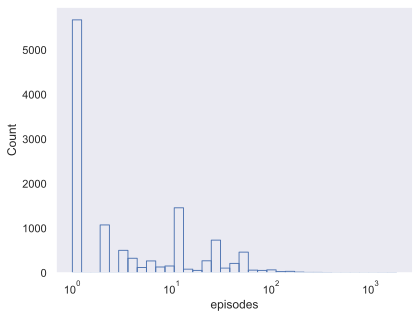

In [22]:
sns.histplot(data=anime_df,x='episodes',log_scale=True,fill=False)
plt.grid(False)
plt.show()

#### Rating

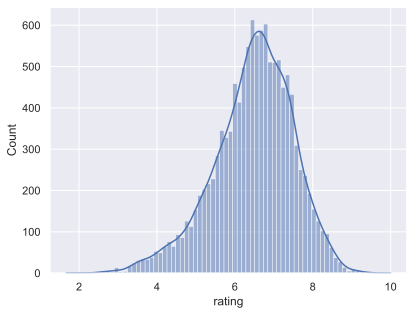

In [23]:
sns.histplot(data=anime_df, x="rating",kde=True)
plt.show()

- seems like rating follows a nice normal distribution